In [75]:
#Import libraries
#import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [76]:
df =pd.read_csv("../Data/Final_Loans_dataset.csv", low_memory=False)
df.head()

,ID,GENDER,AGE,NO_DEFAULT_LOAN,EMPLOYMENT_STATUS,SECTOR,MARITAL_STATUS,CREDIT_SCORE,SCOREGRADE,CRR,CURRENCY,NET INCOME,PRINCIPAL_AMOUNT,EMI,OD_DAYS,PRUDENTIAL_CLASSIFICATION,RISK_GRADE,AREARS,LOAN_STATUS
0,40654.0,FEMALE,37,7.0,EMPLOYED,FINANCE & INSURANCE,MARRIED,615.0,II,B10,KES,NaN,"642,000.00","59,826.37",204.0,DOUBTFUL,B9,"453,208.12",CURRENT
1,40655.0,MALE,41,3.0,SELF-EMPLOYED,NaN,MARRIED,529.0,JJ,B20,KES,NaN,"78,000.00","6,149.03",295.0,DOUBTFUL,B9,"68,917.29",EXPIRED
2,40664.0,MALE,36,6.0,EMPLOYED,TRANSPORT & COMMUNICATION,MARRIED,665.0,FF,A5,KES,NaN,"80,000.00","7,439.02",0.0,NORMAL,A1-A6,4.84,CURRENT
3,40687.0,MALE,41,5.0,EMPLOYED,NaN,0,618.0,HH,B20,KES,NaN,"172,000.00","16,062.90",323.0,DOUBTFUL,B9,"195,045.53",EXPIRED
4,40688.0,MALE,41,1.0,EMPLOYED,FINANCE & INSURANCE,SINGLE,696.0,DD,A5,KES,NaN,"300,502.44","28,098.61",0.0,NORMAL,A1-A6,247.18,CURRENT


In [77]:
# check the number of columns and rows 
print(f'there are {df.shape[0]} rows and {df.shape[1]} columns')

there are 1048575 rows and 19 columns


## Null/NaN values 

In [78]:
# check for null values 
df.isna().sum()

ID                           1030378
GENDER                       1030826
AGE                                0
NO_DEFAULT_LOAN              1030653
EMPLOYMENT_STATUS            1030378
SECTOR                       1030505
MARITAL_STATUS               1030378
CREDIT_SCORE                 1030653
SCOREGRADE                   1030653
CRR                          1030378
CURRENCY                     1030378
NET INCOME                   1048575
PRINCIPAL_AMOUNT             1030378
EMI                          1030378
OD_DAYS                      1030378
PRUDENTIAL_CLASSIFICATION    1030378
RISK_GRADE                   1030378
AREARS                       1030378
LOAN_STATUS                  1030378
dtype: int64

As shown above there are alot of empty rows.

In [79]:
df.tail(1030380)

,ID,GENDER,AGE,NO_DEFAULT_LOAN,EMPLOYMENT_STATUS,SECTOR,MARITAL_STATUS,CREDIT_SCORE,SCOREGRADE,CRR,CURRENCY,NET INCOME,PRINCIPAL_AMOUNT,EMI,OD_DAYS,PRUDENTIAL_CLASSIFICATION,RISK_GRADE,AREARS,LOAN_STATUS
18195,112241.0,FEMALE,30,0.0,SELF-EMPLOYED,BUILDING & CONSTRUCTION,SINGLE,694.0,DD,A5,KES,NaN,"5,000.00","1,721.71",0.0,NORMAL,A1-A6,0,CURRENT
18196,112246.0,FEMALE,36,1.0,0,INDIVIDUALS,0,721.0,CC,A5,KES,NaN,"110,000.00","19,395.60",0.0,NORMAL,A1-A6,0,CURRENT
18197,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18198,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18199,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Majority of rows after 18196 are NaN and therefore we shall clean by subsetting only the first 18196 rows from our dataset. 

In [80]:
# Keep only the first 18,196 rows
df_cleaned = df.head(18196)

# Check the shape of the cleaned dataset
print("Rows after cleaning:", df_cleaned.shape[0])
#df_cleaned.to_csv("../Data/cleaned_dataset.csv", index=False)

Rows after cleaning: 18196


In [81]:
df_cleaned.isna().sum()

ID                               0
GENDER                         448
AGE                              0
NO_DEFAULT_LOAN                275
EMPLOYMENT_STATUS                0
SECTOR                         127
MARITAL_STATUS                   0
CREDIT_SCORE                   275
SCOREGRADE                     275
CRR                              0
CURRENCY                         0
NET INCOME                   18196
PRINCIPAL_AMOUNT                 0
EMI                              0
OD_DAYS                          0
PRUDENTIAL_CLASSIFICATION        0
RISK_GRADE                       0
AREARS                           0
LOAN_STATUS                      0
dtype: int64

In [82]:
df_1 = pd.read_csv("../Data/Cleaned_dataset.csv")
df_1.isna().sum()

ID                             0
GENDER                       448
AGE                            0
NO_DEFAULT_LOAN              275
EMPLOYMENT_STATUS              0
SECTOR                       127
MARITAL_STATUS                 0
CREDIT_SCORE                 275
SCOREGRADE                   275
CRR                            0
CURRENCY                       0
NET INCOME                   434
PRINCIPAL_AMOUNT               0
EMI                            0
OD_DAYS                        0
PRUDENTIAL_CLASSIFICATION      0
RISK_GRADE                     0
AREARS                         0
LOAN_STATUS                    0
dtype: int64

In [83]:

df_1.tail()

,ID,GENDER,AGE,NO_DEFAULT_LOAN,EMPLOYMENT_STATUS,SECTOR,MARITAL_STATUS,CREDIT_SCORE,SCOREGRADE,CRR,CURRENCY,NET INCOME,PRINCIPAL_AMOUNT,EMI,OD_DAYS,PRUDENTIAL_CLASSIFICATION,RISK_GRADE,AREARS,LOAN_STATUS
18191,194938.0,FEMALE,37,0.0,EMPLOYED,INDIVIDUALS,0,757.0,AA,A3,KES,674717.91,60000.0,"5,545.94",0.0,NORMAL,A1-A6,0,CURRENT
18192,128816.0,FEMALE,25,1.0,SELF-EMPLOYED,MANUFACTURING & PROCESSING,SINGLE,585.0,II,A5,KES,299212.00,5000.0,"1,721.71",0.0,NORMAL,A1-A6,0,CURRENT
18193,320610.0,FEMALE,38,1.0,EMPLOYED,MANUFACTURING & PROCESSING,MARRIED,704.0,DD,A5,KES,320832.00,8000.0,"2,754.73",0.0,NORMAL,A1-A6,0,CURRENT
18194,252431.0,FEMALE,29,2.0,EMPLOYED,NON PROFIT INSTITUTIONS,MARRIED,607.0,II,A5,KES,693087.00,13000.0,"4,476.44",0.0,NORMAL,A1-A6,0,CURRENT
18195,100763.0,FEMALE,30,0.0,SELF-EMPLOYED,BUILDING & CONSTRUCTION,SINGLE,694.0,DD,A5,KES,261190.00,5000.0,"1,721.71",0.0,NORMAL,A1-A6,0,CURRENT


In [84]:
df_1.shape

(18196, 19)

In [85]:
# Show the data types of all columns
df_1.dtypes 

ID                           float64
GENDER                        object
AGE                           object
NO_DEFAULT_LOAN              float64
EMPLOYMENT_STATUS             object
SECTOR                        object
MARITAL_STATUS                object
CREDIT_SCORE                 float64
SCOREGRADE                    object
CRR                           object
CURRENCY                      object
NET INCOME                   float64
PRINCIPAL_AMOUNT             float64
EMI                           object
OD_DAYS                      float64
PRUDENTIAL_CLASSIFICATION     object
RISK_GRADE                    object
AREARS                        object
LOAN_STATUS                   object
dtype: object


Looking at the column data types, it seems that there are several columns with mixed data types. Specifically:

AGE, PRINCIPAL_AMOUNT, EMI, AREARS are of type object, but they seem like they should be numeric (such as integer or float).

CRR, SCOREGRADE, MARITAL_STATUS, SECTOR, EMPLOYMENT_STATUS, and RISK_GRADE are object type, which seems appropriate for categorical variables.

NO_DEFAULT_LOAN, CREDIT_SCORE, NET_INCOME, OD_DAYS are float64, which seems correct for numeric columns.

Steps to address the mixed data types and clean the dataset:

Fix the AGE, PRINCIPAL_AMOUNT, EMI, and AREARS Columns: These columns should likely be numeric. Some entries might have non-numeric values (such as strings, missing values, or special characters), which causes pandas to infer the column as object. You can clean and convert them to numeric data types.
You can try the following code to convert these columns:

The errors='coerce' argument will turn any invalid values (like strings or symbols) into NaN values.

Handle Missing Values (NaN): After converting, you will likely have NaN values in the columns where there were non-numeric values. You can decide how to handle these NaN values:
Fill with a placeholder value (e.g., 0 or the column mean). Drop rows with NaN values in those columns. Example to fill NaN with the mean of the column:

Inspect and Clean Categorical Columns: Ensure that categorical columns such as GENDER, MARITAL_STATUS, SECTOR, etc., do not contain any unexpected characters or missing values. If needed, you can clean these columns by standardizing the values or converting them into appropriate categories.
For example, for the GENDER column:

This code strips extra spaces and replaces shorthand values (M and F) with full values (Male, Female).

Double-check Data Types: After cleaning, you can verify the data types to make sure the columns are in the expected format:

In [86]:
# convert age and principal amount to numerics 
#df_1["AGE"] = pd.to_numeric(df_1["AGE"], errors='coerce')
#df_1["PRINCIPAL_AMOUNT"] = pd.to_numeric(df["PRINCIPAL_AMOUNT"], errors='coerce')

In [87]:
df_1.loc[:, 'AGE'] = pd.to_numeric(df_1['AGE'], errors='coerce')
df_1.loc[:, 'PRINCIPAL_AMOUNT'] = pd.to_numeric(df_1['PRINCIPAL_AMOUNT'], errors='coerce')

In [88]:
df_1.dtypes 

ID                           float64
GENDER                        object
AGE                           object
NO_DEFAULT_LOAN              float64
EMPLOYMENT_STATUS             object
SECTOR                        object
MARITAL_STATUS                object
CREDIT_SCORE                 float64
SCOREGRADE                    object
CRR                           object
CURRENCY                      object
NET INCOME                   float64
PRINCIPAL_AMOUNT             float64
EMI                           object
OD_DAYS                      float64
PRUDENTIAL_CLASSIFICATION     object
RISK_GRADE                    object
AREARS                        object
LOAN_STATUS                   object
dtype: object

In [89]:
print(df_1["EMI"])

0        59,826.37
1         6,149.03
2         7,439.02
3        16,062.90
4        28,098.61
           ...    
18191     5,545.94
18192     1,721.71
18193     2,754.73
18194     4,476.44
18195     1,721.71
Name: EMI, Length: 18196, dtype: object


In [90]:
print(df_1["AREARS"])

0        453,208.12
1         68,917.29
2              4.84
3        195,045.53
4            247.18
            ...    
18191             0
18192             0
18193             0
18194             0
18195             0
Name: AREARS, Length: 18196, dtype: object


In [91]:
# remove commas from EMI and AREARS and convert to numerics 
df_1["EMI"] = df_1["EMI"].str.replace(",", "").astype(float)
df_1["AREARS"] = df_1["AREARS"].str.replace(",", "").astype(float)

Drop NAN from CREDIT_SCORE,NET INCOME,GENDER and SECTOR features since filling them would misrepresente the data.

In [92]:
df_1.dropna(subset=["CREDIT_SCORE", "NET INCOME", "GENDER", "SECTOR"], inplace=True)

In [93]:

df_1.isna().sum()

ID                            0
GENDER                        0
AGE                          40
NO_DEFAULT_LOAN               0
EMPLOYMENT_STATUS             0
SECTOR                        0
MARITAL_STATUS                0
CREDIT_SCORE                  0
SCOREGRADE                    0
CRR                           0
CURRENCY                      0
NET INCOME                    0
PRINCIPAL_AMOUNT              0
EMI                           0
OD_DAYS                       0
PRUDENTIAL_CLASSIFICATION     0
RISK_GRADE                    0
AREARS                        0
LOAN_STATUS                   0
dtype: int64

In [94]:
# Handle missing values by filling with column mean (or you could drop rows)
df_1['AGE'].fillna(df_1['AGE'].mean(), inplace=True)

In [95]:
df_1.isna().sum()

ID                           0
GENDER                       0
AGE                          0
NO_DEFAULT_LOAN              0
EMPLOYMENT_STATUS            0
SECTOR                       0
MARITAL_STATUS               0
CREDIT_SCORE                 0
SCOREGRADE                   0
CRR                          0
CURRENCY                     0
NET INCOME                   0
PRINCIPAL_AMOUNT             0
EMI                          0
OD_DAYS                      0
PRUDENTIAL_CLASSIFICATION    0
RISK_GRADE                   0
AREARS                       0
LOAN_STATUS                  0
dtype: int64

In [99]:
df_1.shape

(17374, 19)

After cleaning we finally remain with 17374 rows and 19 columns. We will further clean removing columns that add litle or no value to our project object. Columns to dropped are gender , SECTOR, CRR, MARITAL_STATUS, CURRENCY, PRUDENTIAL CLASSIFICATION. 

In [101]:
# drop columns 
df_1.drop(columns=["MARITAL_STATUS", "GENDER", "CURRENCY", "SECTOR", "PRUDENTIAL_CLASSIFICATION", "CRR"])

,ID,AGE,NO_DEFAULT_LOAN,EMPLOYMENT_STATUS,CREDIT_SCORE,SCOREGRADE,NET INCOME,PRINCIPAL_AMOUNT,EMI,OD_DAYS,RISK_GRADE,AREARS,LOAN_STATUS
0,209801.0,37.0,7.0,EMPLOYED,615.0,II,5000.00,642000.00,59826.37,204.0,B9,453208.12,CURRENT
2,145878.0,36.0,6.0,EMPLOYED,665.0,FF,1294783.78,80000.00,7439.02,0.0,A1-A6,4.84,CURRENT
4,493960.0,41.0,1.0,EMPLOYED,696.0,DD,4210957.00,300502.44,28098.61,0.0,A1-A6,247.18,CURRENT
6,280570.0,38.0,0.0,EMPLOYED,632.0,HH,44280.00,82000.72,6802.81,111.0,B8,26582.90,CURRENT
7,45325.0,32.0,0.0,EMPLOYED,622.0,HH,1000139.59,339584.95,15279.32,19.0,A1-A6,15519.98,CURRENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18191,194938.0,37.0,0.0,EMPLOYED,757.0,AA,674717.91,60000.00,5545.94,0.0,A1-A6,0.00,CURRENT
18192,128816.0,25.0,1.0,SELF-EMPLOYED,585.0,II,299212.00,5000.00,1721.71,0.0,A1-A6,0.00,CURRENT
18193,320610.0,38.0,1.0,EMPLOYED,704.0,DD,320832.00,8000.00,2754.73,0.0,A1-A6,0.00,CURRENT
18194,252431.0,29.0,2.0,EMPLOYED,607.0,II,693087.00,13000.00,4476.44,0.0,A1-A6,0.00,CURRENT


After dropping specific columns weremain with 13. 

## Feature Engineering For Target 
Since we do not have our target, we will generate it by feature engineering based visible and direct correlation of available variables. Our traget variable is **DEFAULT_RISK** which is a classification variable. Variables such as EMI, NET INCOME, AREARS, CREDIT_SCORE AND OD_DAYS have a direct impact on our target unlike other variables whose patterns are hidden. 

In [107]:
# write a function that can generate the dafault risk variable
# the classes will be representeb by binary classes of 1 and 0 where 1 means high risk while 0 is low risk  
def default_risk_calc(row):
    if row["CREDIT_SCORE"]<600:
        return 1
    elif row["EMI"]> row["NET INCOME"]*0.25:
        return 1
    elif row["AREARS"]>10000:
        return 1
    elif row["OD_DAYS"]>90:
        return 1
    else:
        return 0

In [108]:
# apply the function on the dataset to generate the target. 
df_1["DEFAULT_RISK"] = df_1.apply(default_risk_calc, axis =1)

In [109]:
# check the target 
print(df_1["DEFAULT_RISK"])

0        1
2        0
4        0
6        1
7        1
        ..
18191    0
18192    1
18193    0
18194    0
18195    0
Name: DEFAULT_RISK, Length: 17374, dtype: int64


In [136]:
df_1["DEFAULT_RISK"].value_counts()

DEFAULT_RISK
0    12757
1     4617
Name: count, dtype: int64

## Outliers 
Outliers are data points that differ significantly with other data points in the datset. Determine and visualize the presence of ooutliers in the dataset. We will use quartile formula to check and visualize. 

In [113]:
# define Q1, Q3, IQR,lower and upper bounds. 
# But before that we first declare the numeric variables in our datset
numeric_cols = df_1.select_dtypes(include=['float64', 'int64']).columns
numeric_cols

Index(['ID', 'AGE', 'NO_DEFAULT_LOAN', 'CREDIT_SCORE', 'NET INCOME',
       'PRINCIPAL_AMOUNT', 'EMI', 'OD_DAYS', 'AREARS', 'DEFAULT_RISK'],
      dtype='object')

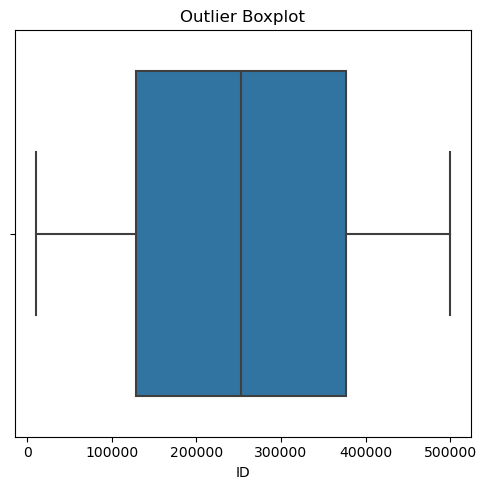

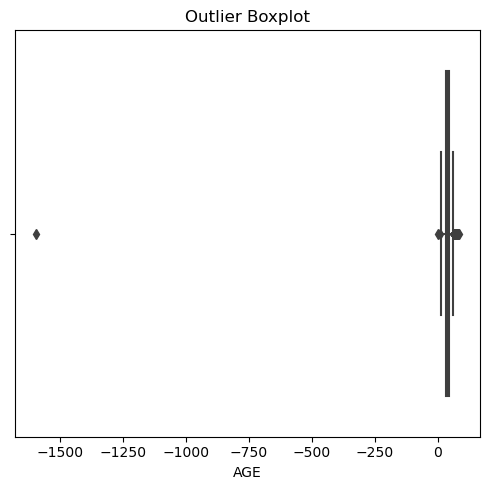

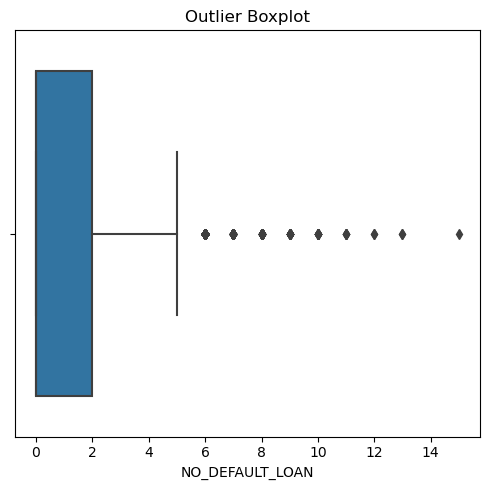

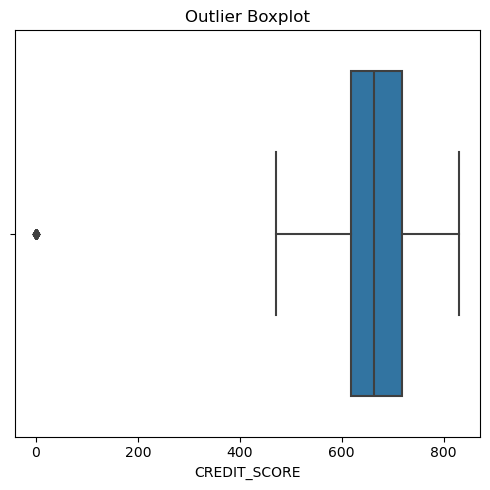

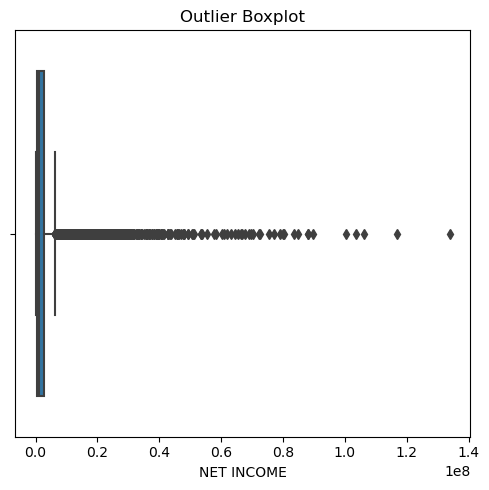

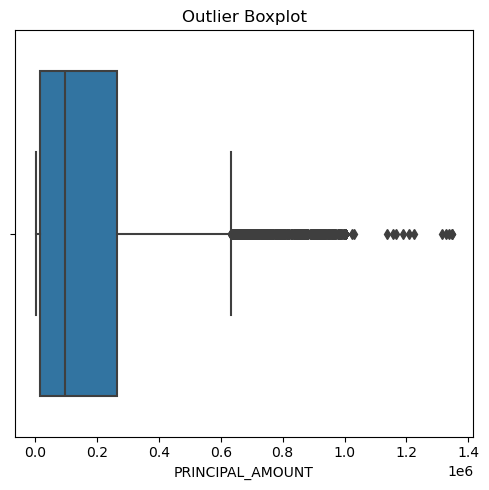

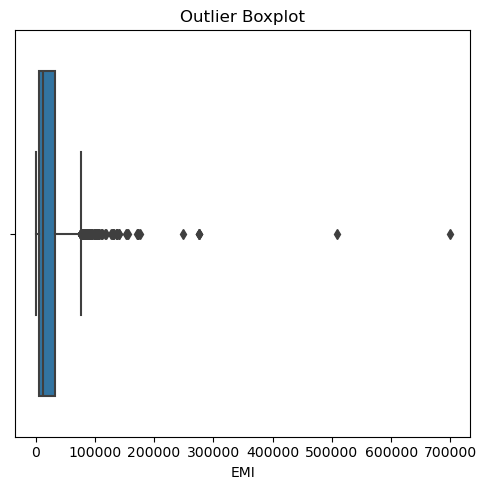

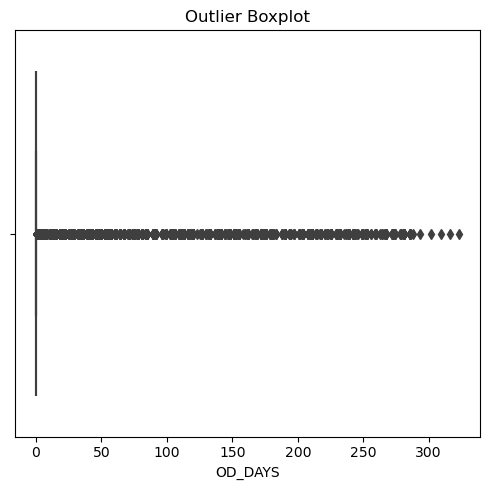

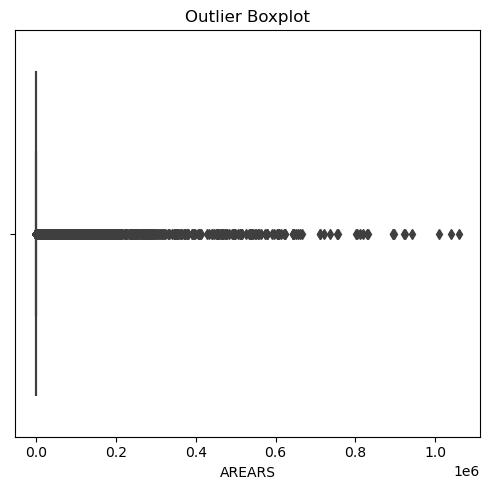

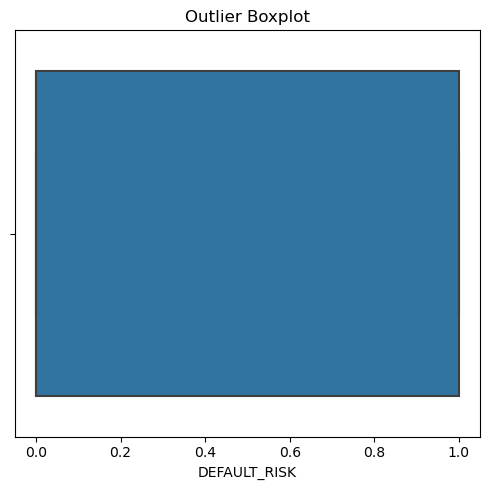

In [134]:
# visualize using boxplot
for i, col in enumerate(numeric_cols, 1):
    plt.figure(figsize=(5,5))
    sns.boxplot(x=df_1[col])
    plt.title("Outlier Boxplot")
    plt.tight_layout()
    plt.show()